In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp

In [59]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
dataframe = read_csv("Admission_Predict.csv", header=None)
dataframe.drop(dataframe.index[0], inplace = True)
dataframe = dataframe.astype(float)

To have a better view of the residuals vs. fitted values plot in the assignment pdf, I adjust the height and weight of each subplot, so it might not show properly in Jupyter Notebook. 

<IPython.core.display.Javascript object>


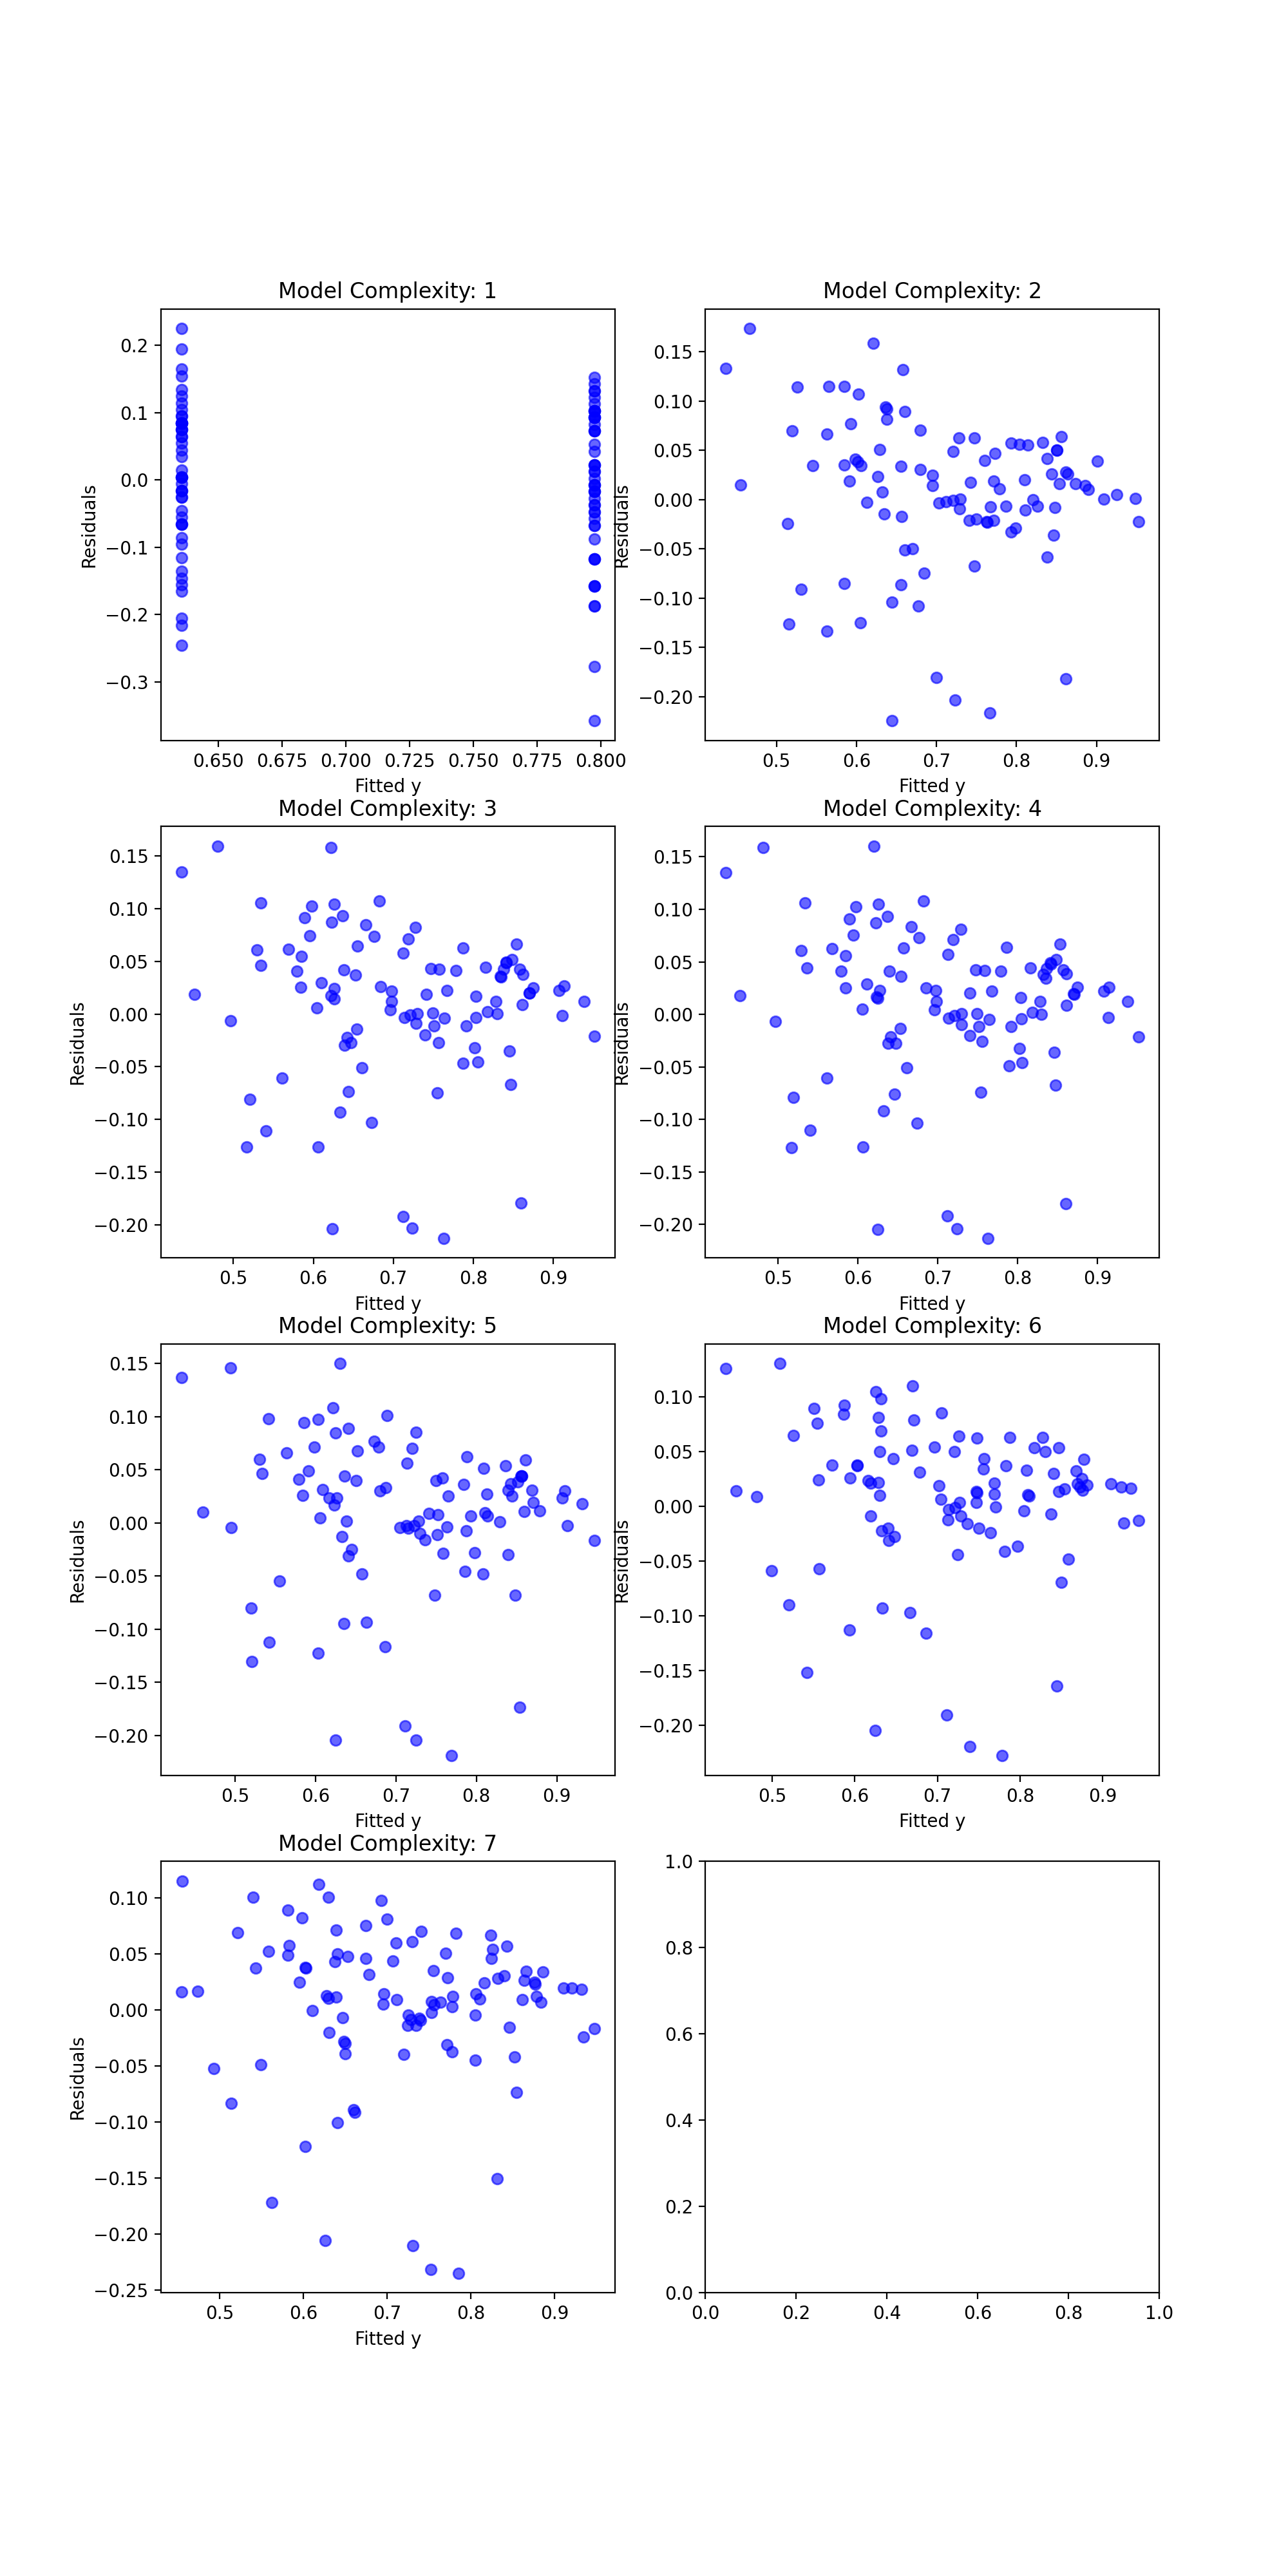

coef: [0.14469985]
R2: 0.30040198881795155
0.533981
0.0
coef: [0.2035514  0.03765692]
R2: 0.8021686276870997
0.533981
0.0
coef: [0.01803641 0.17605609 0.02680651]
R2: 0.8093053773675845
0.533981
0.0
coef: [-0.00431971  0.02632918  0.17714002  0.03274216]
R2: 0.8096399059526522
0.533981
0.0
coef: [ 0.01499568 -0.02315389  0.0186753   0.18786515  0.03911728]
R2: 0.8050148522221644
0.533981
0.0
coef: [ 0.00462852  0.00747282 -0.00761276  0.02464664  0.13689582  0.0231949 ]
R2: 0.8176207518447159
0.533981
0.0
coef: [ 0.00181677  0.00347828  0.01242908 -0.01377433  0.01818697  0.11656695
  0.02844267]
R2: 0.8192939898933496
0.533981
0.0


In [82]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
# separate into inputs and outputs
data = dataframe.values
y = data[:, -1]
biasList = []
varList = []

fig, subaxes = plt.subplots(4,2, figsize=(10,20))


for i,k in zip(range(7,0, -1), range(0, 14, 1)):
    X= data[:, i:-1]
    # print(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)
    y_fitted = linreg.predict(X_train)
    y_predict = linreg.predict(X_test)
    mse, bias, var = bias_variance_decomp(
        linreg, X_train, y_train, X_test, y_test, loss = 'mse')
    print("coef: {}".format(linreg.coef_))
    print("R2: {}".format(linreg.score(X_train,y_train)))
    print(bias)
    print(var)
    
    biasList.append(bias)
    varList.append(var)
    residuals = y_test - y_predict

    subaxes.flat[k].plot(y_predict, residuals, 'o',  alpha=0.6, color = 'blue', label='Test Data')
    #subaxes.flat[k].plot(X_test, y_predict, '^',  alpha=0.6,color = 'red', label='Predict Data')
    #subaxes.flat[k].plot(X_train, y_train, 'o', alpha = 0.6, color = 'blue', label = 'Train Data')
    #subaxes.flat[k].plot(X_train, y_fitted, 'o', alpha = 0.6, color = 'orange', label = 'Fitted Data')
    subaxes.flat[k].set_xlabel('Fitted y')
    subaxes.flat[k].set_ylabel('Residuals')
    subaxes.flat[k].set_title('Model Complexity: {}'.format(k+1))
    #subaxes.flat[k].legend()
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
x_num = [i for i in range(1,8)]
#plt.savefig("./residuals")
    

In [75]:
biasList

[0.533981, 0.533981, 0.533981, 0.533981, 0.533981, 0.533981, 0.533981]

From the residual plots, we could see the residuals become more close to 0, which corresponds to the assumption. 

<IPython.core.display.Javascript object>


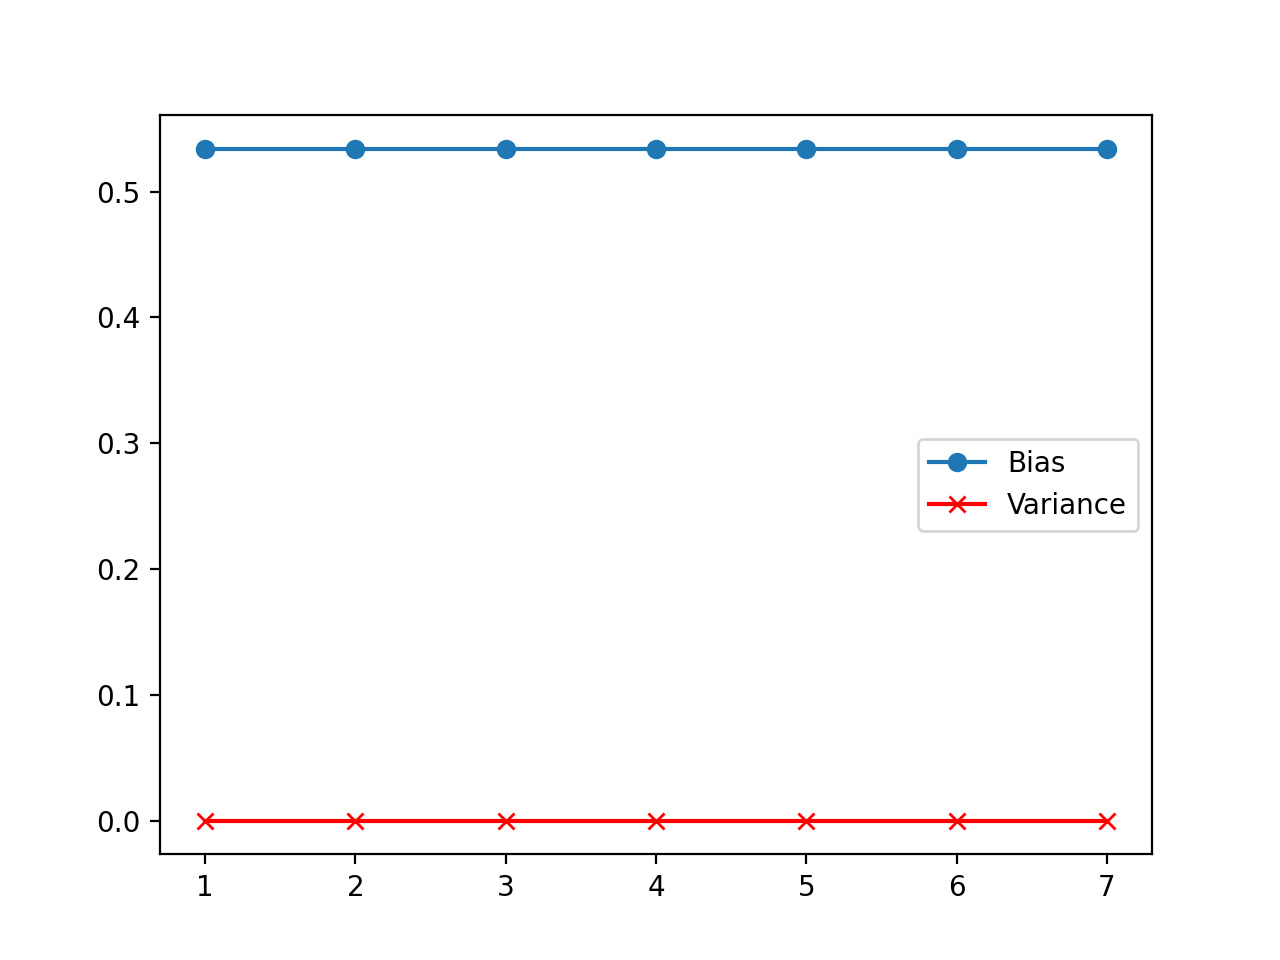

In [76]:
fig = plt.figure()
plt.plot(x_num, biasList, '-o', x_num, varList, '-xr')
plt.legend(['Bias', 'Variance'])

plt.show()

<IPython.core.display.Javascript object>


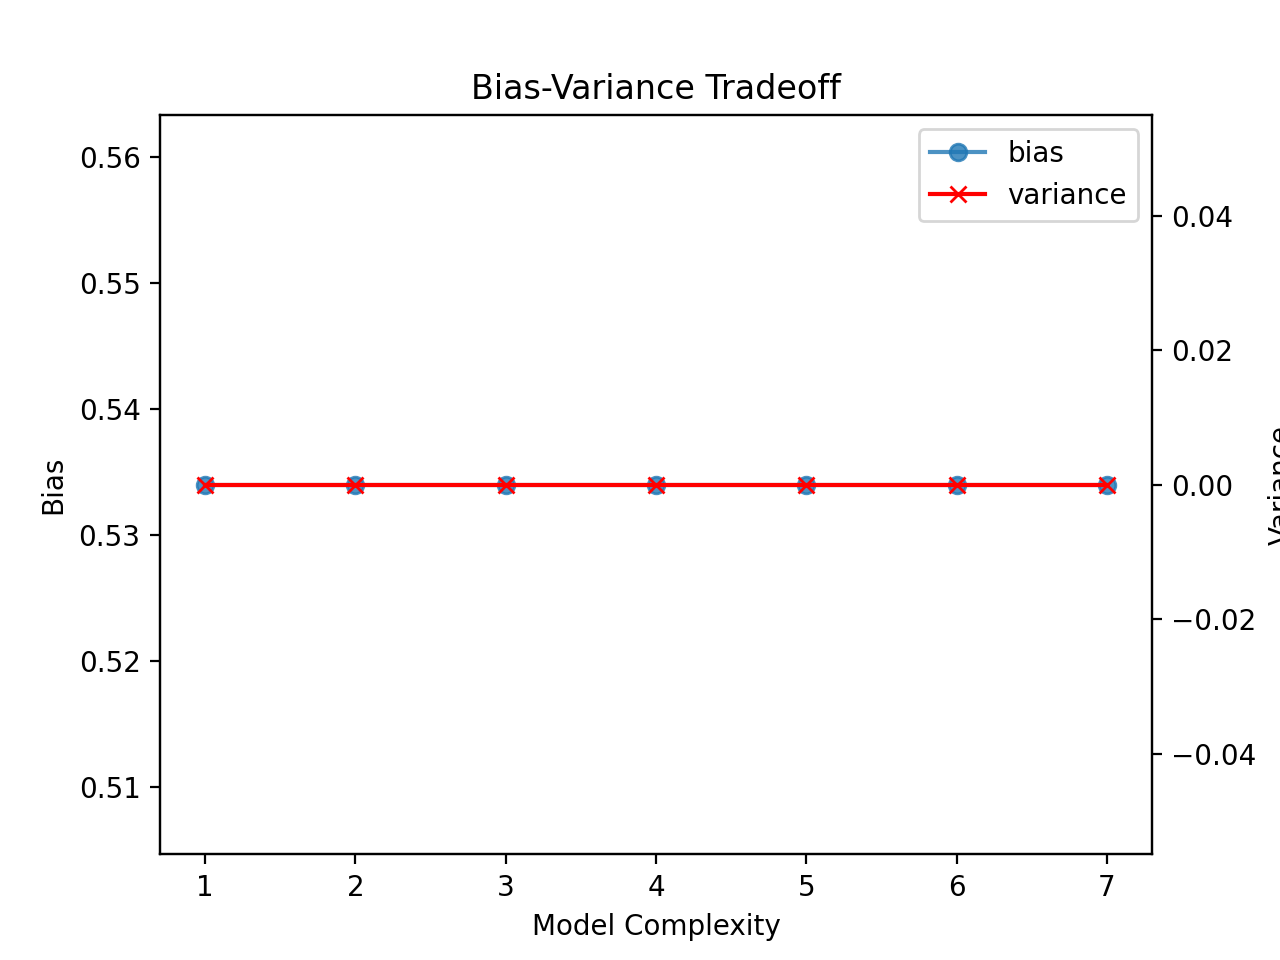

In [67]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_num, biasList, '-o',alpha=0.8, label = 'bias')
ax1.set_ylabel('Bias')
ax1.set_xlabel('Model Complexity')
ax1.set_title('Bias-Variance Tradeoff')

ax2 = ax1.twinx()
ax2.plot(x_num, varList, '-xr', label = 'variance')
ax2.set_ylabel('Variance')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [68]:
dataframe.head()

,0,1,2,3,4,5,6,7,8
1,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
2,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
3,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
4,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
5,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
